Interactive tutorial on using the functions witin the optical_mutlilayer (om) module.
Created by Dr. Bill Robertson and David Heson. 

Initial version of the tutorial, more explanations and examples will be added + any new features will receive their own section. 

Please email any suggestions or questions to Dr. Robertson ((william.robertson@mtsu.edu) or David Heson (dch376@msstate.edu). 

In [2]:
# importing the modules which will be used in this tutorial

import numpy as np
import optical_multilayer as om
import matplotlib.pyplot as plt

/home/david/.pyenv/versions/anaconda3-5.3.1/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


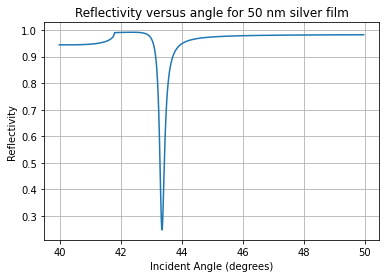

In [5]:
# Simulation of the reflectivity versus angle of a 50 nm silver film
# in a prism/silver/air configuration

index = np.array([complex(1.5,0.0), complex(0.03,4.24),complex(1.0,0.0)])
thickness = np.array([complex(50e-9,0.0)])

angstart = 40*(np.pi/180)
angend = 50*(np.pi/180)

R = om.multilayer(index, thickness, mode = 'rp', step = 5000, option_aw = 'a', e_opt = 'n',
               a1 = angstart, a2 = angend, w_t = 650e-9, w1 = 400e-9, w2 = 750e-9,
               ang = np.pi/3, n_wv_dic = {}, nw_list = [], limit = 1000e-9)

plt.plot(R[:,0]*57.2598,R[:,1])
plt.xlabel('Incident Angle (degrees)')
plt.ylabel('Reflectivity')
plt.title('Reflectivity versus angle for 50 nm silver film')
plt.grid()
plt.show()

/home/david/.pyenv/versions/anaconda3-5.3.1/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


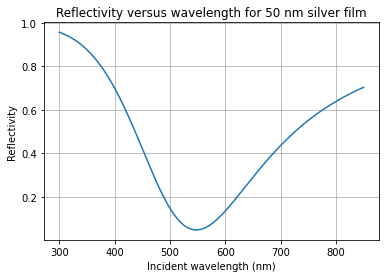

In [6]:
# Simulation of the reflectivity versus wavelength of a 50 nm silver film
# in a prism/silver/air configuration


angle = 43.35*(np.pi/180)
W = om.multilayer(index, thickness, mode = 'rp', step = 5000, option_aw = 'w', e_opt = 'n',
               a1 = np.pi/6, a2 = np.pi/2, w_t = 650e-9, w1 = 300e-9, w2 = 850e-9,
               ang = angle, n_wv_dic = {}, nw_list = [], limit = 1000e-9)

plt.plot(W[:,0]*1e9,W[:,1])
plt.xlabel('Incident wavelength (nm)')
plt.ylabel('Reflectivity')
plt.title('Reflectivity versus wavelength for 50 nm silver film')
plt.grid()
plt.show()

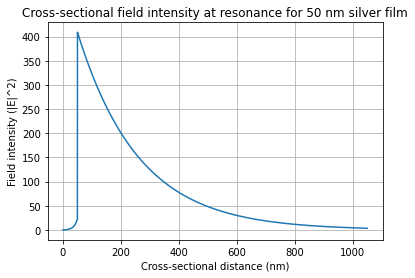

In [11]:
# Simulation of cross-sectional electromagnetic field intensity (e_opt = 'y') for 50 nm
# silver film. The calculation is done at 650 nm at the resonant angle for surface
# plasmon generation as determined in the first plot.

Ef = om.multilayer(index, thickness, mode = 'rp', step = 5000, option_aw = 'w', e_opt = 'y',
               a1 = np.pi/6, a2 = np.pi/2, w_t = 650e-9, w1 = 300e-9, w2 = 850e-9,
               ang = angle, n_wv_dic = {}, nw_list = [], limit = 1000e-9)

plt.plot(Ef[:,0]*1e9,Ef[:,1])
plt.xlabel('Cross-sectional distance (nm)')
plt.ylabel('Field intensity (|E|^2)')
plt.title('Cross-sectional field intensity at resonance for 50 nm silver film')
plt.grid()
plt.show()

/home/david/.pyenv/versions/anaconda3-5.3.1/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


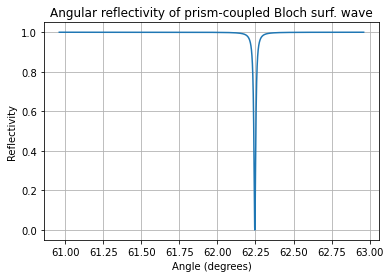

In [13]:
# Bloch surface wave simulation for a SiO2/TiO2 multilayer.

ntio = np.sqrt(4.84+0.0007*1j)
nsio = np.sqrt(2.1316+0.0001*1j)
dtio = complex(121e-9,0)
dsio = complex(188e-9,0)
ddefect= complex(410e-9,0)

indexB = np.array([complex(1.5,0),ntio,nsio,ntio,nsio,ntio,nsio,ntio,nsio,complex(1.0,0)])
thicknessB = np.array([dtio,dsio,dtio,dsio,dtio,dsio,dtio,ddefect])
angstart=61*(np.pi/180)
angend=63*(np.pi/180)

RBSW = om.multilayer(indexB, thicknessB, mode = 'rs', step = 10000, option_aw = 'a', e_opt = 'n',
               a1 = angstart, a2 = angend, w_t = 650e-9, w1 = 400e-9, w2 = 750e-9,
               ang = np.pi/3, n_wv_dic = {}, nw_list = [], limit = 1000e-9)

plt.plot(RBSW[:,0]*57.2598,RBSW[:,1])
plt.xlabel('Angle (degrees)')
plt.ylabel('Reflectivity')
plt.title('Angular reflectivity of prism-coupled Bloch surf. wave')
plt.grid()
plt.show()

/home/david/.pyenv/versions/anaconda3-5.3.1/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


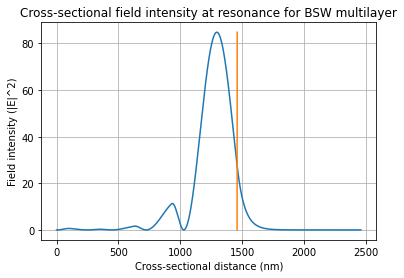

In [14]:
# BSW Field profile. The cross-sectional EM filed intensity is plotted at the resonant angle
# found in the previous plot. Note that the field is normalized to E=1 in the initial medium.

angleB = 62.25*(np.pi/180)

EfBSW = om.multilayer(indexB, thicknessB, mode = 'rs', step = 10000, option_aw = 'w', 
                      e_opt = 'y', a1 = np.pi/6, a2 = np.pi/2, w_t = 650e-9, 
                      w1 = 300e-9, w2 = 850e-9, ang = angleB, n_wv_dic = {}, nw_list = [], 
                      limit = 1000e-9)

Ind = np.round(np.sum(thicknessB)*1e9)
xplot = np.array([Ind,Ind+1])
ymax=np.max(EfBSW[:,1])
yplot=np.array([0,ymax])

plt.plot(EfBSW[:,0]*1e9,EfBSW[:,1])
plt.plot(xplot,yplot)
plt.xlabel('Cross-sectional distance (nm)')
plt.ylabel('Field intensity (|E|^2)')
plt.title('Cross-sectional field intensity at resonance for BSW multilayer')
plt.grid()
plt.show()